In [1]:
from cProfile import label
from email import header
from ntpath import join
from os import sep
from statistics import mean, median
from tkinter.ttk import Separator
from xml.etree.ElementPath import xpath_tokenizer
from scipy.io import loadmat
import pandas
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
import numpy as np
import seaborn as sns
from scipy.signal import find_peaks
import pingouin as pg
from pingouin import homoscedasticity

In [2]:
#data, we would like to evaluate
healthy='ZM001_b_data'
paralyzed='SM021_bar_data'

#load data for healthy one
datah=pandas.read_csv(join(r'C:\Users\kuba8\MATLAB Drive\projekt oblicej\dataPython',healthy+'.txt'),sep=' ',header=None)
datah=datah.transpose()

#load data for paralyzed one
datap=pandas.read_csv(join(r'C:\Users\kuba8\MATLAB Drive\projekt oblicej\dataPython',paralyzed+'.txt'),sep=' ',header=None)
datap=datap.transpose()

C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


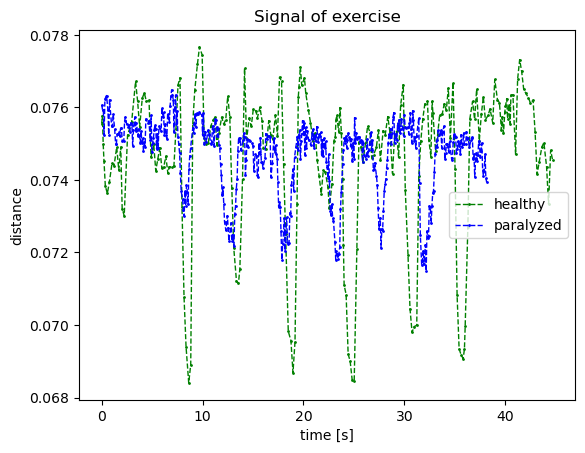

In [3]:
#number of the study point
num=15

#plot measured line
f,ax = plt.subplots()
plt.plot(datah[len(datah.columns)-1]-datah[len(datah.columns)-1][0],datah[num], color='green', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='green', markersize=1,label='healthy')
plt.plot(datap[len(datah.columns)-1]-datap[len(datah.columns)-1][0],datap[num], color='blue', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='blue', markersize=1,label='paralyzed')
ax.set_title('Signal of exercise')
ax.set_xlabel('time [s]')
ax.legend()
if num<12:
    ax.set_ylabel('angle [degrees]')
else:
    ax.set_ylabel('distance')
plt.show()

In [4]:
#fuction for selecting specific area 
def select2(x,rel_hig, wid,dis,a,b,promin=0):

    #set initial prominence
    if promin==0:
        promin=(max(x[a:b])-mean(x[a:b]))*0.5

    #function for finding peaks
    peaks, properties = find_peaks(-x[a:b], prominence=promin, rel_height=rel_hig, width=wid, distance=dis)

    #repeat until number of pekas is less or equal than 6
    if len(peaks)>6:
        promin=promin+0.002/20
        peaks,properties=select2(x, rel_hig, wid,dis,a,b,promin)
    properties["prominences"], properties["widths"]

    #returns oder indexes of peaks(peaks) and borders of peaks(properties)
    return peaks, properties

In [5]:
def selectpeaks(xv,yv,p, rel_hig, wid,dis,a=0,b=0):
    if b==0:
        b=len(yv)

    #get information about specific area
    peak,prop=select2(yv, rel_hig, wid,dis,a,b)
    peak=peak+a

    #plot selected peaks
    plt.plot(yv)
    plt.plot(peak, yv[peak], "x")
    plt.vlines(x=peak, ymin=yv[peak] + prop["prominences"], ymax = yv[peak], color = "C1")
    plt.hlines(y=-prop["width_heights"], xmin=prop["left_ips"]+a, xmax=prop["right_ips"]+a, color = "C1")
    plt.show()

    #make from peaks one signal with x and y coordinates
    x=np.array([])
    y=np.array([])
    for i in range(0,len(peak)):
        xpo=xv[round(prop['left_ips'][i]+a)-p:round(prop['right_ips'][i]+a)+p]
        ypo=yv[round(prop['left_ips'][i]+a)-p:round(prop['right_ips'][i]+a)+p]
        x=np.append(x,xpo)
        y=np.append(y,ypo)
    return x,y

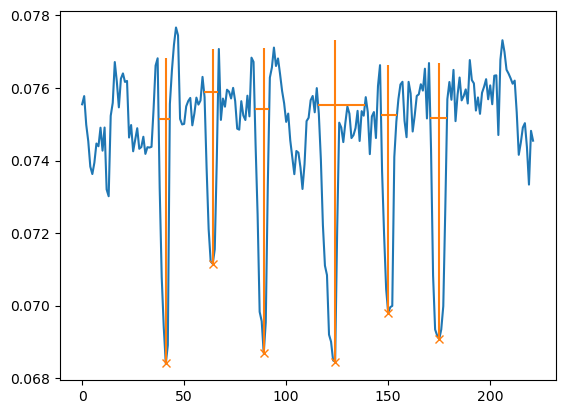

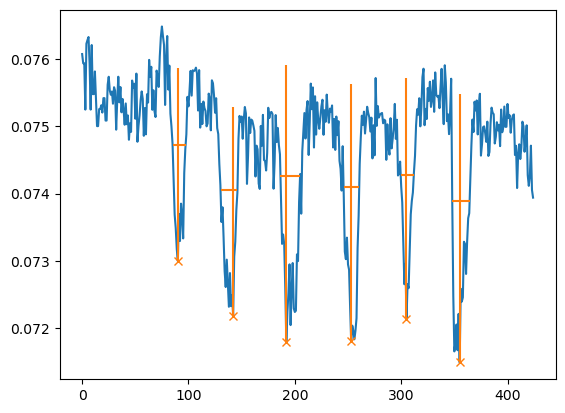

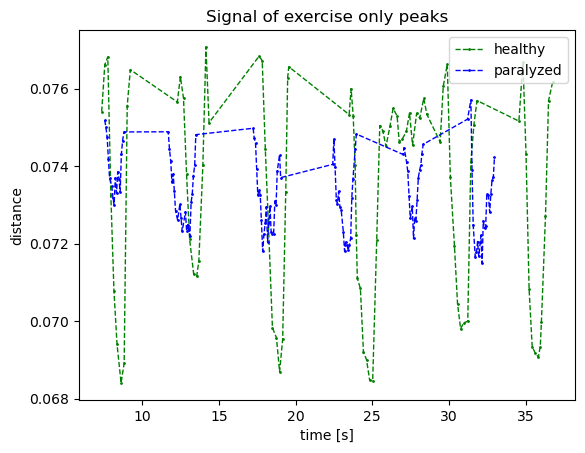

In [6]:
#get signal with exercises from two signals
xh,yh=selectpeaks(datah[len(datah.columns)-1]-datah[len(datah.columns)-1][0],datah[num],2,0.8,1,5.5)
xp,yp=selectpeaks(datap[len(datah.columns)-1]-datap[len(datah.columns)-1][0],datap[num],2,0.6,2,7.5,30)

#plot measured line only peaks
f,ax = plt.subplots()
#plt.plot(datap[41]-datap[41][0],datap[40], color='green', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='green', markersize=1,label='healthy')
plt.plot(xh, yh, color='green', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='green', markersize=1,label='healthy')
plt.plot(xp, yp, color='blue', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='blue', markersize=1,label='paralyzed')

ax.set_title('Signal of exercise only peaks')
ax.set_xlabel('time [s]')
ax.legend()

if num<12:
    ax.set_ylabel('angle [degrees]')
else:
    ax.set_ylabel('distance')
plt.show()

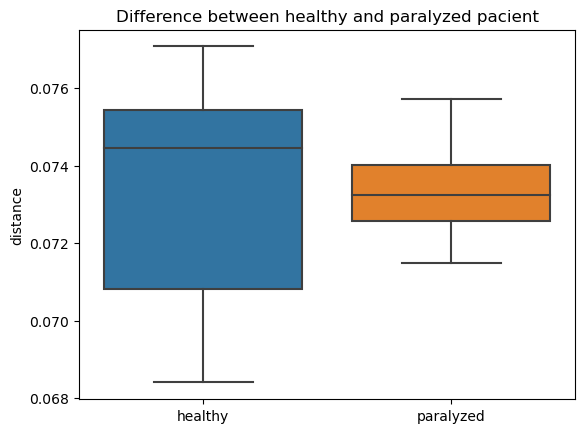

In [7]:
#boxplot
f,ax = plt.subplots()
ax.set_title('Difference between healthy and paralyzed pacient')
if num<12:
    ax.set_ylabel('angle [degrees]')
else:
    ax.set_ylabel('distance')
sns.boxplot([yh,yp])
ax.set(xticklabels=['healthy','paralyzed'])
plt.show()

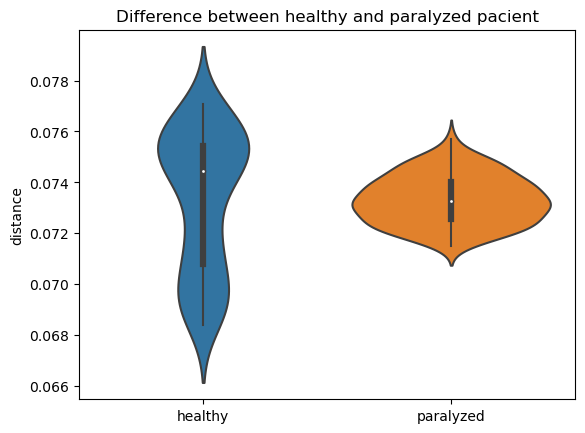

In [8]:
#violinplot
f,ax = plt.subplots()
ax.set_title('Difference between healthy and paralyzed pacient')
if num<12:
    ax.set_ylabel('angle [degrees]')
else:
    ax.set_ylabel('distance')

sns.violinplot([yh,yp])
ax.set_xticks([0,1])
ax.set(xticklabels=['healthy','paralyzed'])

plt.show()

In [9]:
def process(data,num,num2):

    #select specific points in signal
    peak1,prop1=select2(data[num],0.8,1,5.5,0,len(data))

    #widen area of peaks
    p=2
    x=np.array([])

    #make signal composed from exercises
    for j in range(0,len(peak1)):
        xpo=data[num2][round(prop1['left_ips'][j])-p:round(prop1['right_ips'][j])+p]
        x=np.append(x,xpo)
    return x

In [10]:
#make Kruskal-Will test for all records in names
index=np.array([])
p_val=pandas.DataFrame([])
#big_table=pd.DataFrame([])
for l in range(0,41):
    dataset=pandas.DataFrame([])   

    #get specific area of peaks
    #dataset['healthy']=process(datah,25,l)
    #dataset['paralysed']=process(datap,25,l)
    
    df1 = pandas.DataFrame({'value':process(datah,25,l), 'label': 'healthy'})#random.choices(data,k=20)})
    df2 = pandas.DataFrame({'value':process(datap,25,l), 'label': 'paralyzed'})
    dataset=pandas.concat([df1,df2], axis=0)
    if l<12:#12
        kr=pg.kruskal(dataset,dv='value',between='label')
        if kr['p-unc'][0]<0.05:
            hod=False
        else:
            hod=True
        kr=pandas.DataFrame({'W':kr['H'],'pval':kr['p-unc'],'equal':hod})
    else:
        kr=homoscedasticity(dataset,dv='value',group='label')
        kr=pandas.DataFrame({'W':kr['W'],'pval':kr['pval'],'equal':kr['equal_var']})
    #kr=kruskal(dataset.groupby(by='label'))
    p_val=pandas.concat([p_val,kr])
    index=np.append(index,l)
    
    #df = pd.DataFrame({'value':data, 'label': names[k]})
    #dataset=pd.concat([dataset,df], axis=0)
        
    #making big table
    #table_h = pd.DataFrame({'sex':[names[k][1]],'status':[names[k][0]],'ID_number':[names[k][2:5]],'point':[names[k][1]]})
    #big_table=pd.concat([big_table,table_h], axis=0)

p_val['point']=index
    #if kr['pval'][0]>0.05:
    #    i+=1
    #p_val=np.append(p_val,kr[1])


#kr=homoscedasticity(xp,yp)
#p_val=pd.concat([p_val,kr])
#index=np.append(index,l)
#points = p_val[p_val["equal_var"] == True]

In [11]:
p_val

,W,pval,equal,point
Kruskal,153.327177,3.249146e-35,False,0.0
Kruskal,153.327177,3.249146e-35,False,1.0
Kruskal,153.327177,3.249146e-35,False,2.0
Kruskal,153.327177,3.249146e-35,False,3.0
Kruskal,153.327177,3.249146e-35,False,4.0
Kruskal,153.327177,3.249146e-35,False,5.0
Kruskal,153.327177,3.249146e-35,False,6.0
Kruskal,153.327177,3.249146e-35,False,7.0
Kruskal,153.327177,3.249146e-35,False,8.0
Kruskal,153.327177,3.249146e-35,False,9.0


In [12]:
pointsl = p_val[p_val["equal"] == False]
#pointsk = p_val[p_val["equal_mean"] == False]
#points=pandas.concat([pointsk,pointsl])

In [13]:
pointsl

,W,pval,equal,point
Kruskal,153.327177,3.249146e-35,False,0.0
Kruskal,153.327177,3.249146e-35,False,1.0
Kruskal,153.327177,3.249146e-35,False,2.0
Kruskal,153.327177,3.249146e-35,False,3.0
Kruskal,153.327177,3.249146e-35,False,4.0
Kruskal,153.327177,3.249146e-35,False,5.0
Kruskal,153.327177,3.249146e-35,False,6.0
Kruskal,153.327177,3.249146e-35,False,7.0
Kruskal,153.327177,3.249146e-35,False,8.0
Kruskal,153.327177,3.249146e-35,False,9.0


In [14]:
pointsl['point']

Kruskal     0.0
Kruskal     1.0
Kruskal     2.0
Kruskal     3.0
Kruskal     4.0
Kruskal     5.0
Kruskal     6.0
Kruskal     7.0
Kruskal     8.0
Kruskal     9.0
Kruskal    10.0
Kruskal    11.0
levene     12.0
levene     13.0
levene     14.0
levene     15.0
levene     16.0
levene     17.0
levene     18.0
levene     19.0
levene     20.0
levene     21.0
levene     22.0
levene     23.0
levene     24.0
levene     25.0
levene     26.0
levene     27.0
levene     28.0
levene     29.0
levene     30.0
levene     31.0
levene     32.0
levene     33.0
levene     34.0
levene     35.0
levene     36.0
levene     37.0
levene     38.0
levene     39.0
levene     40.0
Name: point, dtype: float64

In [15]:
peak1,prop1=select2(datah[25], 0.8, 1,5.5,0,len(datah))
peak2,prop2=select2(datap[25], 0.8, 1,5.5,0,len(datah))
      
p_values=np.array([])
p=2
for i in range(0,len(datah.columns)-1):
    x=np.array([])
    y=np.array([])

    #make signal with all peaks
    for j in range(0,min(len(peak2),len(peak1))):
        xpo=datah[i][round(prop1['left_ips'][j])-p:round(prop1['right_ips'][j])+p]
        ypo=datap[i][round(prop2['left_ips'][j])-p:round(prop2['right_ips'][j])+p]
        x=np.append(x,xpo)
        y=np.append(y,ypo)

    #mann-whitny U test
    stat=pg.mwu(x,y,alternative='two-sided')
    p_val=stat['p-val'][0]
    p_values=np.append(p_values,p_val)

In [16]:
p_values

array([2.73720295e-32, 2.73720295e-32, 2.73720295e-32, 2.73720295e-32,
       2.73720295e-32, 2.73720295e-32, 2.73720295e-32, 2.73720295e-32,
       2.73720295e-32, 2.73720295e-32, 2.73720295e-32, 2.73720295e-32,
       7.93301182e-01, 7.89579837e-01, 7.07159537e-05, 5.88603230e-05,
       3.00076991e-07, 3.63438735e-07, 1.18961236e-02, 1.02186715e-02,
       2.94216002e-17, 1.82564072e-17, 5.53261638e-01, 5.82724153e-01,
       3.97299772e-01, 3.86614402e-01, 2.38916564e-05, 7.99185180e-08,
       3.33097748e-03, 7.60947094e-02, 1.39679416e-26, 1.28166461e-28,
       1.19364132e-12, 1.01956708e-12, 9.53893617e-31, 9.53893617e-31,
       9.08673429e-01, 9.29759770e-01, 1.67377549e-04, 1.56410086e-04,
       3.97673019e-32])

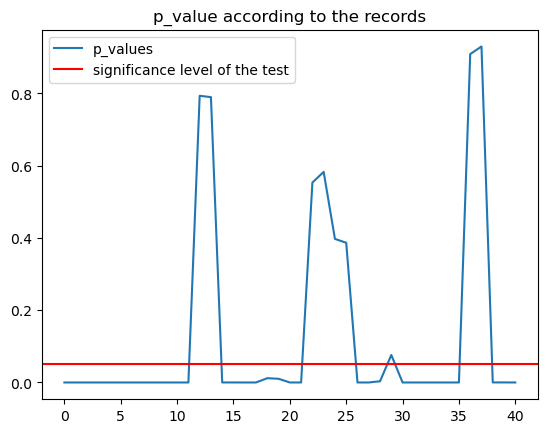

In [17]:
#plot p-values for each pair of value
plt.plot(p_values,label='p_values')
plt.axhline(y=0.05, color='r', linestyle='-',label='significance level of the test')
plt.title('p_value according to the records')
plt.legend()
plt.show()

In [18]:
#######################################################################
'''
#fuction for selecting specific area manually
def select(x,y):
    #select specific area from measured signal
    global peak
    peak=np.array([[0,0]])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()

    ax.plot(x, y, '-')
    ax.set_title('Press left mouse button and drag to test')

    def onselect(xmin, xmax):
        global peak
        indmin, indmax = np.searchsorted(x, (xmin, xmax))
        indmax = min(len(x) - 1, indmax)

        thisx = x[indmin:indmax]
        thisy = y[indmin:indmax]
    
        fig.canvas.draw_idle()

        peak=np.append(peak, np.c_[thisx, thisy],axis=0)
    
    # set useblit True on gtkagg for enhanced performance
    span = SpanSelector(ax, onselect, 'horizontal', useblit=True, rectprops=dict(alpha=0.5, facecolor='red'))
    plt.show()
    peak=peak.transpose()
    return peak

peakh=select(datah[40]-datah[40][0],datah[num])
peakp=select(datap[40]-datap[40][0],datap[num])

xh=peakh[0][1:len(peakh[0])]
yh=peakh[1][1:len(peakh[1])]
xp=peakp[0][1:len(peakp[0])]
yp=peakp[1][1:len(peakp[1])]
'''


"\n#fuction for selecting specific area manually\ndef select(x,y):\n    #select specific area from measured signal\n    global peak\n    peak=np.array([[0,0]])\n\n    fig = plt.figure(figsize=(8, 6))\n    ax = fig.add_subplot()\n\n    ax.plot(x, y, '-')\n    ax.set_title('Press left mouse button and drag to test')\n\n    def onselect(xmin, xmax):\n        global peak\n        indmin, indmax = np.searchsorted(x, (xmin, xmax))\n        indmax = min(len(x) - 1, indmax)\n\n        thisx = x[indmin:indmax]\n        thisy = y[indmin:indmax]\n    \n        fig.canvas.draw_idle()\n\n        peak=np.append(peak, np.c_[thisx, thisy],axis=0)\n    \n    # set useblit True on gtkagg for enhanced performance\n    span = SpanSelector(ax, onselect, 'horizontal', useblit=True, rectprops=dict(alpha=0.5, facecolor='red'))\n    plt.show()\n    peak=peak.transpose()\n    return peak\n\npeakh=select(datah[40]-datah[40][0],datah[num])\npeakp=select(datap[40]-datap[40][0],datap[num])\n\nxh=peakh[0][1:len(peak